<a href="https://colab.research.google.com/github/ChikoAbillaBasya/Pembelajaran-Mesin/blob/main/Ektraksi_Fitur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**
---
Pra Pengolahan Data - Ektraksi Fitur (Data Terstruktur)

## **Langkah 1 - Load Data**
---
Import library yang dibutuhkan kemudian, load data kedalam DataFrame Pandas.

## **Pra Pengolahan Data - Ekstraksi Fitur**

Pada praktikum ini kita akan mencoba melakukan Pra pengolahan data dengan encoding, imputasi data  terhadap data yang hilang (*missing value*) dan standarisasi. Setelah melakukan Pra pengolahan Data akan dilakukan ektraksi fitur. Dataset yang digunakan adalah dataset Titanic.

⬇️ **Download** ⬇️

[60KBTitanic-Dataset.csv](https://1473714265-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fhh7WzzoZbeFX9VC0bZSU%2Fuploads%2FlefGVONKVrfDztf8aPzt%2FTitanic-Dataset.csv?alt=media&token=8af4107f-c0b2-4711-8553-0f5ff17cfc26)

In [ ]:
import pandas as pd

data = 'Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

jika menggunakan colab, kita harus upload datanya dulu ke colab, baru kemudian bisa diakses

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv'])) # load dataset

Tampilkan data teratas dengan perintah df.head()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Langkah 2 - Pengecekan Data**
---
Lakukan pengecekan informasi mengenai data dengan menggunakan `df.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dari `df.info()` kita dapat mengetahui jumlah data untuk setiap kolom. Selain itu, kita mengetahui bahwa,

* "Age" berjenis float64
* "Cabin" berjenis object
* "Embarked" berjenis object

***Pada Pandas, object sering kali mewaliki tipe data string. Kita harus cermat dalam hal ini. Hal ini berkaitan dengan teknik imputasi yang akan kita gunakan nantinya.***

Selanjutnya, untuk lebih mengetahui jumlah data yang hilang untuk setiap kolom, gunakan perintah,

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Dari informasi ini, kita dapat mengetahui data yang hilang sejumlah,
* 177 data "Age"
* 687 data "Cabin"
* 2 data "Embarked"

## **Langkah 3 - Imputasi**
---
Pada langkah ini kita akan melakukan imputasi terdapat data yang hilang pada "Age", "Cabin", dan "Embarked".

Strategi yang akan kita gunakan adalah,

* "Age" --> Dikarenakan "Age" adalah data nominal, maka kita akan menggunakan strategi mean.
* "Cabin" --> "Cabin" merupakan informasi terkait dengan nomor kabin penumpang. Disini kita akan berasumsi bahwa, seluruh penumpang yang tidak memiliki nomor kabin, merupakan penumpang yang tinggal di dek-dek kapal. Sehingga kita akan mensubtitusi data yang hilang dengan informasi "DECK".
* :"Embarked" --> "Embarked" merupakan informasi lokasi embarkasi penumpang. Hanya ada 2 data yang hilang disini. Dikarenakan data merupakan data nominal, maka kita dapat menggunakan modus (mode) untuk mensubtitusi data yang hilang.

In [ ]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

/tmp/ipython-input-220269673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].mean(), inplace=True)
/tmp/ipython-input-220269673.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

## **Langkah 4 - Validasi Hasil**
---
Lakukan pengecekan kembali dengan `df.info()`. Selanjutnya, kita juga dapat memastikan kembali apakah nilai yang disikan sudah benar dengan melakukan pencekan data secara langsung. Hasil dari proses imputasi adalah sebagai berikut,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,DECK,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,DECK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,DECK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,DECK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,DECK,C


## **Langkah 5 - Ekstraksi Fitur**
---
Setelah melakukan Pre-Processing, langkah berikutnya kita akan melakukan Ekstraksi Fitur berdasarkan Jumlah keluarga "Familysize", Gelar Jumlah keluarga "Title", kelompok usia "AgeBin", Tempat tiket "CabinDeck"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# === EKSTRAKSI FITUR ===

# 1. FamilySize: jumlah keluarga di kapal (SibSp + Parch + diri sendiri)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# 2. Title: ambil gelar dari kolom Name (Mr, Mrs, Miss, Master, dll.)
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}
df["Title"] = df["Title"].replace(title_mapping)

# 3. AgeBin: kelompokkan usia menjadi kategori
df["AgeBin"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                      labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

# 4. CabinDeck: ambil huruf pertama dari kolom Cabin
df["CabinDeck"] = df["Cabin"].astype(str).str[0]

# 5. Fare per person: bagi harga tiket dengan jumlah keluarga
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

print("✅ Hasil Ekstraksi fitur ")
df[["Name", "Title", "Age", "AgeBin", "FamilySize", "Cabin", "CabinDeck", "FarePerPerson"]].head()

✅ Hasil Ekstraksi fitur 


,Name,Title,Age,AgeBin,FamilySize,Cabin,CabinDeck,FarePerPerson
0,"Braund, Mr. Owen Harris",Mr,22.0,YoungAdult,2,DECK,D,3.62500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0,Adult,2,C85,C,35.64165
2,"Heikkinen, Miss. Laina",Miss,26.0,YoungAdult,1,DECK,D,7.92500
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0,YoungAdult,2,C123,C,26.55000
4,"Allen, Mr. William Henry",Mr,35.0,YoungAdult,1,DECK,D,8.05000


## **Langkah 6 - Visualisasi Hasil Ektraksi Fitur**
---

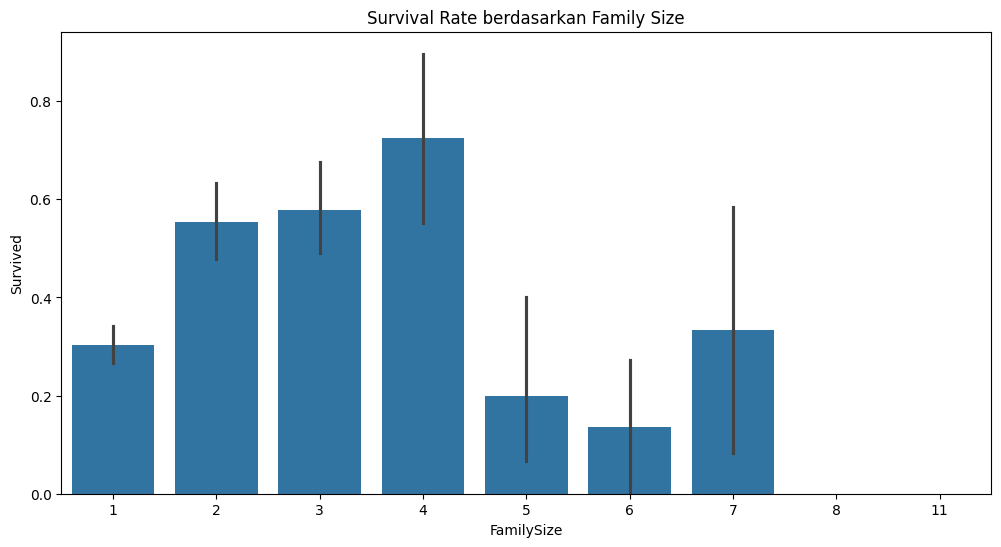

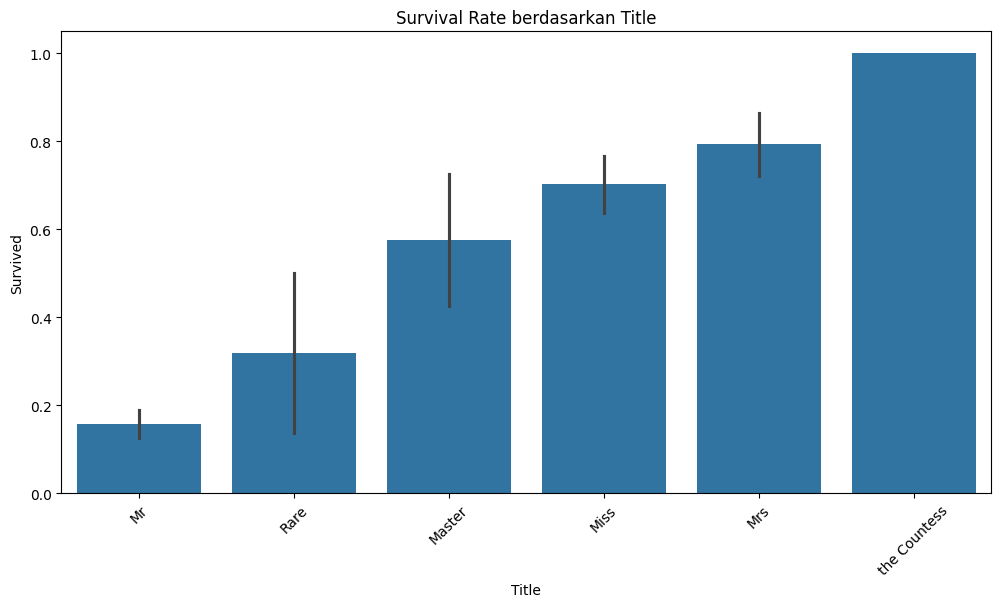

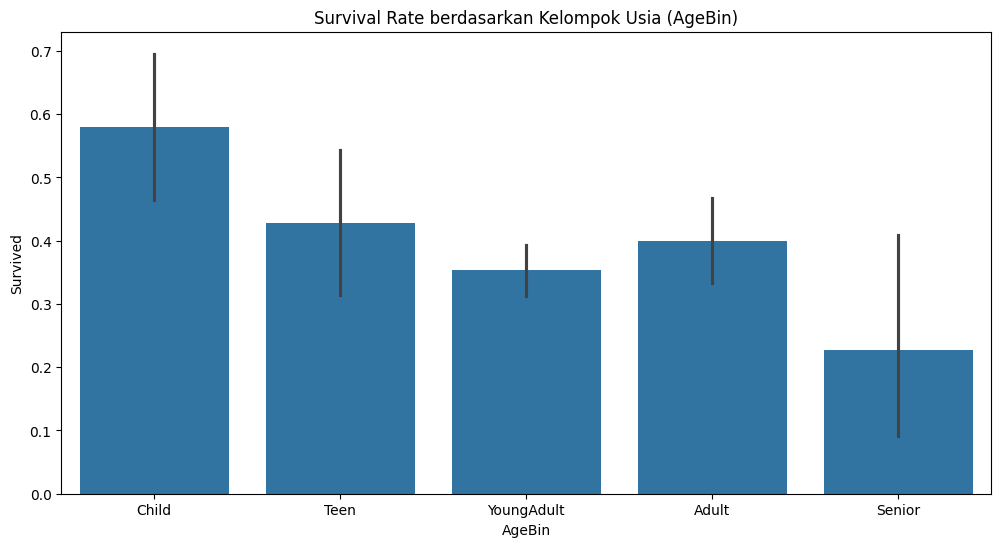

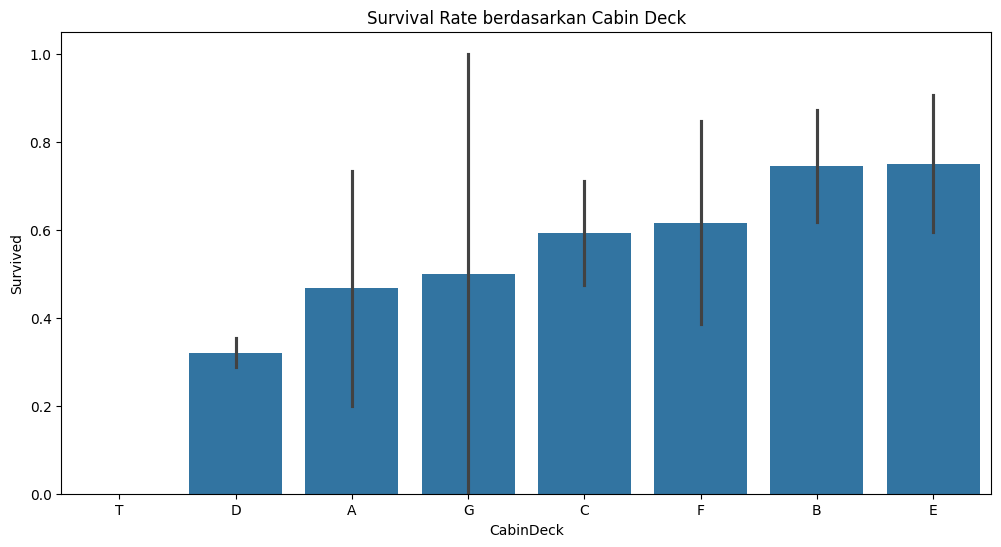

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# === VISUALISASI FITUR HASIL EKSTRAKSI ===

plt.figure(figsize=(12, 6))
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate berdasarkan Family Size")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Title", y="Survived", data=df,
            order=df.groupby("Title")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Title")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="AgeBin", y="Survived", data=df,
            order=["Child", "Teen", "YoungAdult", "Adult", "Senior"])
plt.title("Survival Rate berdasarkan Kelompok Usia (AgeBin)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="CabinDeck", y="Survived", data=df,
            order=df.groupby("CabinDeck")["Survived"].mean().sort_values().index)
plt.title("Survival Rate berdasarkan Cabin Deck")
plt.show()

# **Praktikum 2**
---
Pra Pengolahan Data - Seleksi Fitur

Pada tahap ini kita akan melakukan Pre- Processing sebelum melakukan seleksi Fitur. Pre processing akan melakukan encoding pada data-data kategorikal, yaitu "Sex" dan "Cabin", imputasi data pada "Age", standarisasi pada fitur "Age". Hal ini perlu dilakukan karena algoritma pembelajaran mesin melakukan proses kalkulasi secara matematis. Salah satu strategi yang bisa di gunakan adalah Label Encoding. Label Encoding serupa dengan Ordinal Encoding, bedanya hanya pada proses pengurutan. Label Encoding tidak mengurutkan data terlebih dahulu.

Setelah pre Processing selesai, langkah selanjutnya memilih variabel mana saja yang akan kita gunakan sebagai fitur. Pada bagian dasar teori, kita sudah mempelajari bahwa tidak selalu semua variabel dapat digunakan sebagai fitur. Oleh karena itu, kita dapat memilih fitur yang sekiranya penting untuk tujuan yang ingin kita capai dalam membuat model pembelajaran mesin. Kita akan menggunakan kasus yang sama, yaitu kita kita mengetahui ciri-ciri penumpang kapal Titanic yang selamat. Sehingga, fitur yang kita gunakan adalah,

1. **"Survived"**
2. **"Pclass"**
3. **"Sex"**
4. **"Age"**
5. **"Cabin"**

Kita akan memisahkan variabel-variabel tersebut dari variabel yang lain.

Data yang akan kita gunakan adalah data Titanic yang sudah diperbaiki dengan proses imputasi.

⬇️ **Download** ⬇️

[66KBTitanic-Dataset-fixed.csv](https://1473714265-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fhh7WzzoZbeFX9VC0bZSU%2Fuploads%2FkxFyYw02z3kTMz1ZPgyU%2FTitanic-Dataset-fixed.csv?alt=media&token=79534cd0-6428-4192-b147-6435401209ab)

## **Langkah 0 - Load Library**
---


In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset-fixed.csv to Titanic-Dataset-fixed.csv


## **Langkah 1 - Load Data**
---

In [ ]:
dpath = 'Titanic-Dataset.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Langkah 2 - Pre Processing Encoding Sex**
---
Pada tahap ini akan melakukan encoding pada data-data kategorikal, yaitu "Sex"

## **Langkah 3 - Verifikasi hasil encoding "sex"**

In [ ]:
# --- 2. Encoding fitur 'Sex' ---
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
print("=== Hasil Setelah Encoding 'Sex' ===")
print(df[['Sex']].head(), "\n")

=== Hasil Setelah Encoding 'Sex' ===
   Sex
0    1
1    0
2    0
3    0
4    1 



## **Langkah 4- Pre Processing Encoding "Cabin".**
---
Pada tahap ini akan melakukan encoding pada data-data kategorikal, yaitu "Cabin"

## **Langkah 5 - Verifikasi hasil encoding "Cabin"**

In [ ]:
# --- 3. Encoding fitur 'Cabin' ---
df['Cabin'] = df['Cabin'].fillna('Unknown')
print("=== Hasil Setelah Fill NaN pada 'Cabin' ===")
print(df[['Cabin']].head(5), "\n")
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
print("=== Hasil Ambil huruf pertama 'Cabin' (Deck) ===")
print(df[['Cabin']].head(5), "\n")

=== Hasil Setelah Fill NaN pada 'Cabin' ===
     Cabin
0  Unknown
1      C85
2  Unknown
3     C123
4  Unknown 

=== Hasil Ambil huruf pertama 'Cabin' (Deck) ===
  Cabin
0     U
1     C
2     U
3     C
4     U 



## **Langkah 6 - Pre Processing Imputasi Data**
---
Pada tahapan ini kita akan melakukan imputasi data pada "Age". Tujuan dari langkah ini adalah untuk demonstrasi proses imputasi data dengan nilai **median**.

## **Langkah 7 - Verifikasi Hasil Imputasi Data**

In [ ]:
# --- 4. Standarisasi fitur 'Age' ---
df['Age'] = df[['Age']].fillna(df['Age'].median())
print("=== Hasil Setelah Imputasi Data pada Usia dengan median ===")
print(df[['Age']].head(10), "\n")

=== Hasil Setelah Imputasi Data pada Usia dengan median ===
    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
5  28.0
6  54.0
7   2.0
8  27.0
9  14.0 



## **Langkah 8 - Pre Processing Standarisasi**
---
Pada tahapan ini kita akan melakukan standarisasi pada "Age". **Hal ini sebetulnya tidak terlalu diperlukan karena nilai pada "Age" tidak terlalu jauh.** Tujuan dari langkah ini adalah untuk demonstrasi proses standarisasi.

## **Langkah 9 - Verifikasi Hasil Standarisasi**
---
Cek kembali dengan `df.head()`. Hasilnya akan seperti pada Gambar dibawah ini.

In [ ]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
print("=== Hasil Setelah Standardisasi 'Age' ===")
print(df[['Age']].head(10), "\n")

=== Hasil Setelah Standardisasi 'Age' ===
        Age
0 -0.565736
1  0.663861
2 -0.258337
3  0.433312
4  0.433312
5 -0.104637
6  1.893459
7 -2.102733
8 -0.181487
9 -1.180535 



## **Langkah 10 - Hasil setelah Pre Processing**
---
Pada tahapan ini, akan melakukan pengecekan hasil Pre Processing yang sudah dilakukan yaitu Encoding pada fitur "Sex" dan "Cabin", imputasi data pada "Age", standarisasi pada fitur "Age".

## **Langkah 11 - Verifikasi Hasil setelah Pre Processing**

In [ ]:
# --- 5. Cek hasil akhir ---
print("=== Hasil Preprocessing (5 baris pertama) ===")
#print(df[['Sex', 'Cabin', 'Age']].head(5))
df.head()

=== Hasil Preprocessing (5 baris pertama) ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


## **Langkah 12 - Seleksi Fitur**
---
pada tahap ini akan dipilih 5 variabel sebagai fitur penting yaitu fitur **"Survived". "Pclass", "Age", "Sex",** dan **"Cabin"**.

In [ ]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,U
1,1,1,38.0,0,C
2,1,3,26.0,0,U
3,1,1,35.0,0,C
4,0,3,35.0,1,U


# **Praktikum 3**
---
Spliting Data

Pada pratikum ini, kita akan mencoba 3 macam strategi pembuatan data latih, validasi, dan uji. Data yang digunakan adalah data kapal Titanic yang sudah kita ekstraksi fiturnya pada pratikum sebelumnya

⬇️ **Download** ⬇️

[23KBTitanic-Dataset-selected.csv](https://1473714265-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fhh7WzzoZbeFX9VC0bZSU%2Fuploads%2FLQ0DOD3pGXMn5zvCDSHm%2FTitanic-Dataset-selected.csv?alt=media&token=e9b179af-4aa2-4ad2-a39e-5ddbf4a17fc4)

## **Random Split**
---
## **Langkah 1 - Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset-selected.csv to Titanic-Dataset-selected.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## **Langkah 2 - Split Data**

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


##**Stratified Split**
---
## **Langkah 1 - Load Data**

In [ ]:
import pandas as pd

df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## **Langkah 2 - Split Data**
---
Hasilnya adalah sebagai berikut. Perhatikan rasio-rasio yang dihasilkan.

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


## **Cross Validation 1**
---
Pada praktikum ini, kita akan membuat data latih dan data uji saja dengan menggunakan metode cross validation.

##  **Langkah 1 - Load Data**
---

In [ ]:
import pandas as pd

df3 = pd.read_csv('Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## **Langkah 2 - Split Data**
---
Perhatikan nomor index untuk setiap fold. Jika berhasil, maka seharusnya setiap fold memiliki nomor index yang berbeda untuk setiap data latih dan data uji.

Berikut hasilnya untuk 2 fold pertama.

In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

## **Cross Validation 2**
---
Pada pratikum ini, kita sedikit melakukan pendekatan yang berbeda dibandingkan dengan praktikum sebelumnya. Pertama data akan kita split menjadi data latih dan data uji. Kemudian, data latih kita split menjadi beberapa bagian dengan cross validation untuk kebutuhan data latih dan data validasi.

## **Langkah 1 - Load Data**
---

In [ ]:
import pandas as pd

df4 = pd.read_csv('Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


## **Langkah 2 - Split Data**
---

Hasilnya, pada jumlah data latih seharusnya berkurang karena telah kita split pada tahap awal. Berikut merupakan hasil untuk 2 fold pertama.

In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

# **Praktikum 4**
---
Ekstraksi Fitur Data Tidak Terstruktur



Pada pratikum ini, kita akan mencoba untuk mengekstraksi fitur dari sebuah citra. Proses yang akan kita lakukan hanya proses sederhana. Pembahasan lengkap terkait dengan pra pengolahan data dan ekstraksi fitur pada data citra akan dibahas pada perkuliahan pengolahan citra digital.

Data yang akan kita gunakan adalah citra berikut.

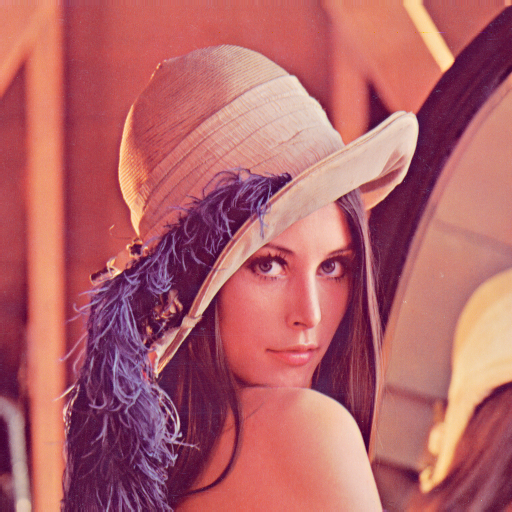

## **Langkah 0 - Instal Library**
---
Pada praktikum ini kita akan menggunakan library `pillow`. Tambahan pillow terlebih dahulu apabila belum terinstal didalam perangkat yang Anda gunakan.

Jalan perintah berikut pada notebook

In [ ]:
!pip install Pillow

## **Langkah 1 - Load Image**
---

In [ ]:
from google.colab import files
uploaded = files.upload() # upload image

Saving Lenna.png to Lenna.png


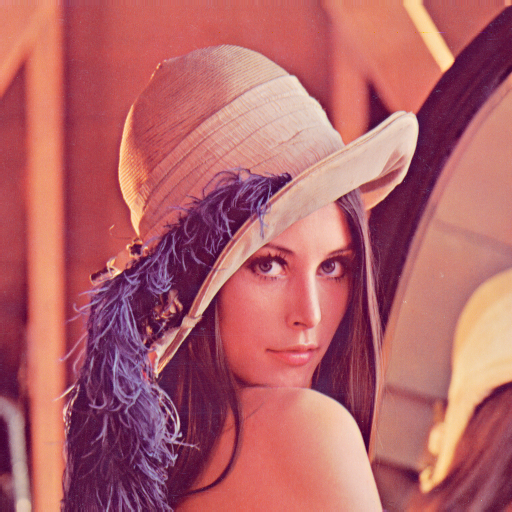

In [ ]:
from PIL import Image

img = Image.open('Lenna.png')
img.show() # tampilkan gambar
display(img) # metode alternatif tampilkan gambar

## **Langkah 2 - Ekstrak Fitur**
---

In [ ]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 8, 6, 10, 9, 20, 37, 32, 41, 53, 74, 103, 132, 179, 193, 242, 238, 336, 386, 404, 483, 607, 628, 771, 785, 1001, 1016, 1177, 1269, 1332, 1446, 1487, 1457, 1574, 1585, 1591, 1557, 1569, 1660, 1648, 1420, 1559, 1418, 1384, 1319, 1342, 1156, 1120, 955, 969, 828, 782, 752, 737, 719, 700, 628, 673, 587, 617, 610, 592, 557, 593, 552, 566, 582, 559, 571, 520, 664, 650, 618, 730, 594, 667, 675, 685, 771, 715, 667, 740, 744, 766, 765, 772, 817, 817, 744, 806, 760, 777, 812, 797, 799, 861, 814, 910, 907, 918, 888, 1011, 879, 996, 912, 952, 884, 1074, 977, 1073, 1040, 1216, 1250, 1403, 1534, 1639, 1682, 1776, 1874, 1769, 1582, 1743, 1441, 1477, 1483, 1409, 1437, 1449, 1389, 1479, 1592, 1655, 1657, 1666, 1857, 1896, 1813, 1979, 1814, 1956, 1928, 2055, 2012, 2303, 2333, 2670, 2787, 3232, 3154, 3476, 3424, 3516, 3102, 31

# **Tugas Praktikum**
---
Wisconsin Breast Cancer

## **Deskripsi Tugas**
---
Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2. Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

## **Data**

[122KBwbc.csv](https://1473714265-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fhh7WzzoZbeFX9VC0bZSU%2Fuploads%2FKeYjwQqNtdgw1kvbaHvO%2Fwbc.csv?alt=media&token=220e0dda-8fff-4223-85fa-d50220f1015f)

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving wbc.csv to wbc.csv


In [ ]:
import pandas as pd

file_path = "wbc.csv"
df = pd.read_csv(file_path)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **1. Pisahkan variabel yang tidak dapat digunakan**
---

In [ ]:
# Hapus kolom id dan kolom kosong
df_clean = df.drop(columns=["id", "Unnamed: 32"])

## **2. Lakukan proses encoding pada kolom "diagnosis"**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom diagnosis (M=1, B=0)
encoder = LabelEncoder()
df_clean["diagnosis"] = encoder.fit_transform(df_clean["diagnosis"])

## **3. Lakukan proses standarisasi pada semua kolom numerik**
---

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df_clean.drop(columns=["diagnosis"])
y = df_clean["diagnosis"]

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **4. Lakukan stratified split data (80:20)**
---

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)
